In [14]:
%matplotlib inline

# MNIST

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

np.random.seed(0)

model1 = Sequential()

model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1),
                  kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', 
                 kernel_initializer="glorot_uniform"))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],
               optimizer=Adadelta())

In [12]:
model1.summary() # channel이 4개가 됨
                 # max_pooling하면 12가 됨
                 # 576size의 vector가 된다

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time
hist1 = model1.fit(X_train, Y_train, 
                   epochs=50, batch_size=100, 
                   validation_data=(X_test, Y_test), 
                   verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 10s - loss: 0.3923 - acc: 0.8880 - val_loss: 0.2095 - val_acc: 0.9428
Epoch 2/50
 - 9s - loss: 0.1832 - acc: 0.9476 - val_loss: 0.1447 - val_acc: 0.9573
Epoch 3/50
 - 9s - loss: 0.1359 - acc: 0.9608 - val_loss: 0.1116 - val_acc: 0.9672
Epoch 4/50
 - 9s - loss: 0.1133 - acc: 0.9672 - val_loss: 0.0950 - val_acc: 0.9711
Epoch 5/50
 - 9s - loss: 0.0996 - acc: 0.9708 - val_loss: 0.0866 - val_acc: 0.9741
Epoch 6/50
 - 9s - loss: 0.0907 - acc: 0.9736 - val_loss: 0.0803 - val_acc: 0.9760
Epoch 7/50
 - 9s - loss: 0.0837 - acc: 0.9757 - val_loss: 0.0738 - val_acc: 0.9771
Epoch 8/50
 - 9s - loss: 0.0781 - acc: 0.9773 - val_loss: 0.0740 - val_acc: 0.9769
Epoch 9/50
 - 9s - loss: 0.0747 - acc: 0.9785 - val_loss: 0.0689 - val_acc: 0.9777
Epoch 10/50
 - 9s - loss: 0.0711 - acc: 0.9790 - val_loss: 0.0720 - val_acc: 0.9780
Epoch 11/50
 - 10s - loss: 0.0683 - acc: 0.9799 - val_loss: 0.0685 - val_acc: 0.9776
Epoch 12/50
 - 9s - loss: 0.0661 

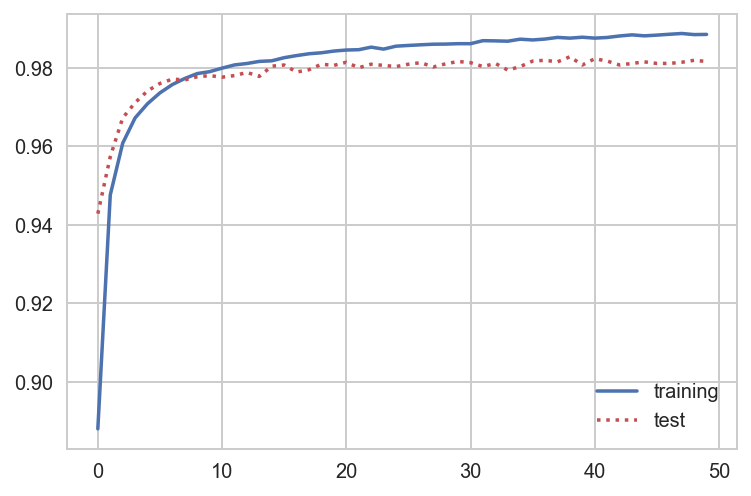

In [15]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

# CIFAR 10
 - color 사진의 경우 시작 channel이 3개다.
 - 4개의 filter를 쓸 경우 4 x 3이 되서 12개가 된다.
 - 끝에 12장이 아닌 4장의 feature map이 나온다. (다시 합치기 때문에)

In [16]:
from keras.datasets import cifar10

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

170500096/170498071 [==============================] - 144s 1us/step
(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int32


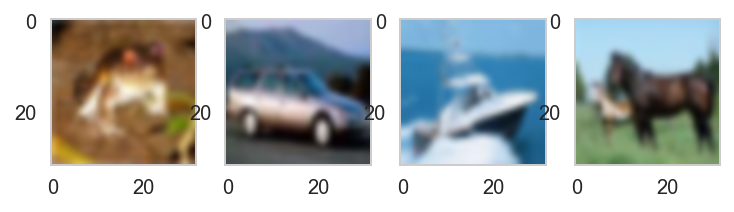

In [17]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [18]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [19]:
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [20]:
np.random.seed(0)

model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [24]:
%%time
hist = model.fit(X_train, Y_train, epochs=50, batch_size=500, validation_data=(X_test, Y_test), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
26000/50000 [==============>...............] - ETA: 7:02 - loss: 2.7323 - acc: 0.1008

KeyboardInterrupt: 

# Image Augmentation
 - image data수가 적을 때는 필수적으로 해주어야 한다

In [4]:
import tensorflow as tf